In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Imputer
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
DATA_PATH = 'C:\\Users\\01yt0\\Desktop\\yfianwu\\'

In [3]:
#Loading dataset
train_txn = pd.read_csv(DATA_PATH+ 'train_transaction.csv')
train_idn = pd.read_csv(DATA_PATH+ 'train_identity.csv')

Handle Transaction Amt

In [36]:
g = train_txn['TransactionAmt']

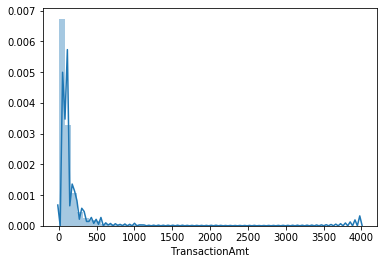

In [41]:
#check the displot for this column
filtered = g[(g >= 0) & (g < 4000)]
sns.distplot(filtered, kde=True, hist=True, hist_kws={"range": [0,4000]})
#we can see the long_tail which is the outlier

In [42]:
#y is the value that is  1 percent and x is the value that is 99 percent
y = g.quantile(q=0.01)
x = g.quantile(q=0.99)
y,x

(9.244, 1104.0)

In [55]:
list1 =[] #make a list that we need to drop 
for i in g.index:
    if g[i] < y or g[i] > x:
        list1.append(i)

In [56]:
G = g.drop(list1) # drop the outlier values

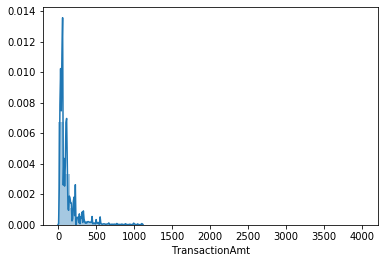

In [57]:
#check the displot after drop outlier
filtered = G[(G >= 0) & (G < 4000)]
sns.distplot(filtered, kde=True, hist=True, hist_kws={"range": [0,4000]})
#the long_tail is gone

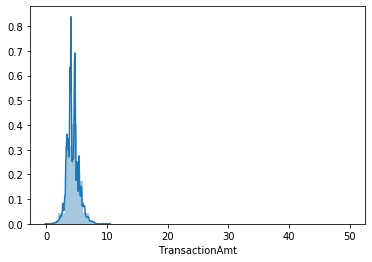

In [58]:
#Add a new feature in the dataframe and plot it to check
N12 = np.log(g)# this is the new feature
filtere = N12[(N12 >= 0) & (N12 < 50)]
sns.distplot(filtere, kde=True, hist=True, hist_kws={"range": [0,50]})

In [59]:
train_txn['N12'] = N12

In [60]:
#check the Column in DF
train_txn['N12']

0         4.226834
1         3.367296
2         4.077537
3         3.912023
4         3.912023
            ...   
590535    3.891820
590536    3.676301
590537    3.432373
590538    4.762174
590539    5.634611
Name: N12, Length: 590540, dtype: float64